In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split

In [25]:
df=pd.read_csv("../dataset/train.csv")

In [26]:
print("\nTotal number of data points ",df.shape[0])
print("\nTotal number of features ",df.shape[1])
print("\nFeature Names ",df.columns)


Total number of data points  20972

Total number of features  9

Feature Names  Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')


## There are two text feature and 6 labels. We have multi label classification dataset

In [27]:
df=df.drop("ID",axis=1)

In [28]:
df.isnull().sum()

TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

## There are no misisng values in our dataset

In [29]:
df.groupby(df.columns.tolist(),as_index=False).size()['size'].value_counts()

1    20972
Name: size, dtype: int64

## We have no duplicate values

In [30]:
label_df=df[['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

In [31]:
text_df=df[['TITLE', 'ABSTRACT']]

In [32]:
frequency_labels=label_df.sum(axis=0)

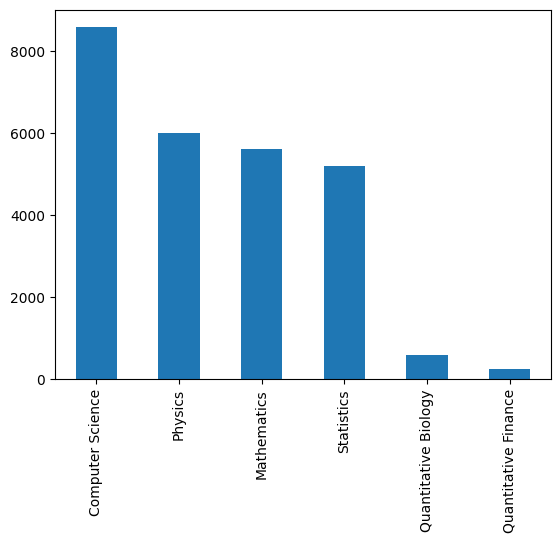

In [33]:
frequency_labels.plot(kind='bar')
plt.show()

## Data is fairly balanced between labels except Quantitative Biology and Quantitative Finance

In [34]:
no_of_labels=label_df.sum(axis=1)

In [35]:
print("Average number of labels per resarch paper is ",no_of_labels.mean())

Average number of labels per resarch paper is  1.2524794964714858


In [36]:
print("Maximum number of labels in a resarch paper is ",no_of_labels.max())

Maximum number of labels in a resarch paper is  3


In [37]:
print("Minimum number of labels in a resarch paper is ",no_of_labels.min())

Minimum number of labels in a resarch paper is  1


<AxesSubplot: >

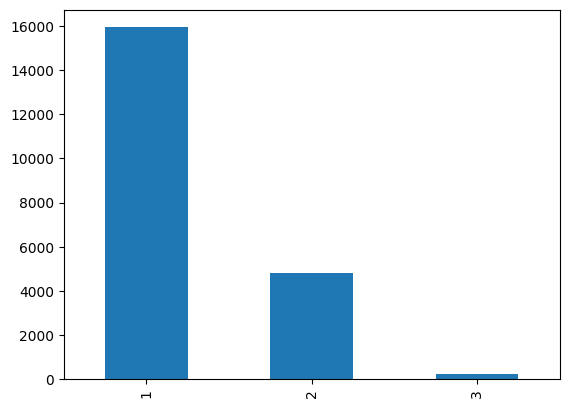

In [38]:
no_of_labels.value_counts().plot(kind='bar')

## We see that number of resarch paper having one label is quite high

In [39]:
stopwords = nltk.corpus.stopwords.words('english')
tokenizer=WhitespaceTokenizer()
lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()
def preprocess(text):
    text=re.sub(r'\n', ' ', text)
    text=re.sub(r'-', ' ', text)
    text=re.sub(r'\s+', ' ', text)
    text=re.sub(r'\([A-za-z\d]*\)', '', text)
    text=text.strip()
    text="".join([i for i in text if i not in string.punctuation])
    text=text.lower()
    tokens = tokenizer.tokenize(text)
    output= [i for i in tokens if i not in stopwords]
    stem_text=[stemmer.stem(word) for word in output]
    lemm_text = [lemmatizer.lemmatize(word) for word in stem_text]
    text=" ".join(lemm_text)
    return text

In [40]:
text_df['TITLE']= text_df['TITLE'].apply(lambda x: preprocess(x))
text_df['ABSTRACT']= text_df['ABSTRACT'].apply(lambda x: preprocess(x))

C:\Users\kanis\AppData\Local\Temp\ipykernel_21752\913529665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['TITLE']= text_df['TITLE'].apply(lambda x: preprocess(x))
C:\Users\kanis\AppData\Local\Temp\ipykernel_21752\913529665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['ABSTRACT']= text_df['ABSTRACT'].apply(lambda x: preprocess(x))


In [41]:
X_train,X_test,y_train,y_test=train_test_split(text_df,label_df,test_size=0.2)

In [42]:
print("Number of points in training dataset ",X_train.shape[0])
print("Number of points in test dataset ",X_test.shape[0])

Number of points in training dataset  16777
Number of points in test dataset  4195


In [43]:
X_train.to_csv('../dataset/X_train.csv',index=False)

In [44]:
X_test.to_csv('../dataset/X_test.csv',index=False)

In [45]:
y_train.to_csv('../dataset/y_train.csv',index=False)

In [46]:
y_test.to_csv('../dataset/y_test.csv',index=False)